In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
Base = pd.read_csv('DetalleCosto.csv')

In [3]:
Base.replace({'REAL': " -   "}, 0, inplace=True)

Base["REAL"] = Base["REAL"].astype(float)
Base["REAL_"] = Base["REAL"]/1000000

In [4]:
Base.replace({'TIPO': "EXPORTACION Y TRANSPORTE"}, "LOGÍSTICA", inplace=True)

In [5]:
Base1 = Base[(Base['AÑO'] == 2021) &
             (Base['TIPOS'] == "COSTO")]

In [6]:
print("Los costos totales anuales de Fusión Agro en el 2021 fueron de:")

Los costos totales anuales de Fusión Agro en el 2021 fueron de:


In [7]:
print ('${:,.2f} M'.format(Base1.REAL_.sum()) )


$235.21 M


In [8]:
print("Costo por empresa en el 2021 ($M)")
Base7 = Base1.groupby(
                                                ['EMPRESA']
                                        ).agg(
                                                {'REAL_': 'sum'}).sort_values(by=['REAL_'], ascending = False).style.bar(subset=['REAL_'], color='red')
display(Base7)

Costo por empresa en el 2021 ($M)


,REAL_
EMPRESA,
MX,111.944186
INT,50.612532
CAC,49.289325
IQCHEM,11.832187
SUD,11.533967


In [9]:
print("Costo por rubro en el 2021 ($M)")
Base8 = Base1.groupby(
                                                ['TIPO']
                                        ).agg(
                                                {'REAL_': 'sum'}).sort_values(by=['REAL_'], ascending = False).style.bar(subset=['REAL_'], color='red')
display(Base8)

Costo por rubro en el 2021 ($M)


,REAL_
TIPO,
COSTO FABRIL,172.042473
REGALIAS,51.262618
LOGÍSTICA,11.907105


In [10]:
print("Resumen de totales por rubro y por empresa ($M)")
Base6 = Base1.groupby(
                                                ['EMPRESA','TIPO']
                                        ).agg(
                                                {'REAL_': 'sum'}).style.bar(subset=['REAL_'], color='red')



Resumen de totales por rubro y por empresa ($M)


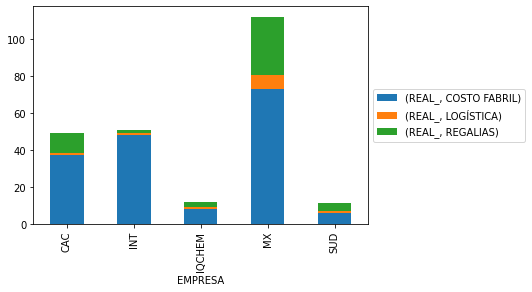

In [11]:
Base5 = Base1.groupby(
                                                ['EMPRESA','TIPO']
                                        ).agg(
                                                {'REAL_': 'sum'})
# Gráfica de barras
pd.DataFrame(Base5.unstack(level = 1)).plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [12]:
print("Detalle numérico ($M)")
display(Base6)

Detalle numérico ($M)


In [13]:
print("Los costos por mes y por empresa en el 2021 ($M) son:")


Los costos por mes y por empresa en el 2021 ($M) son:


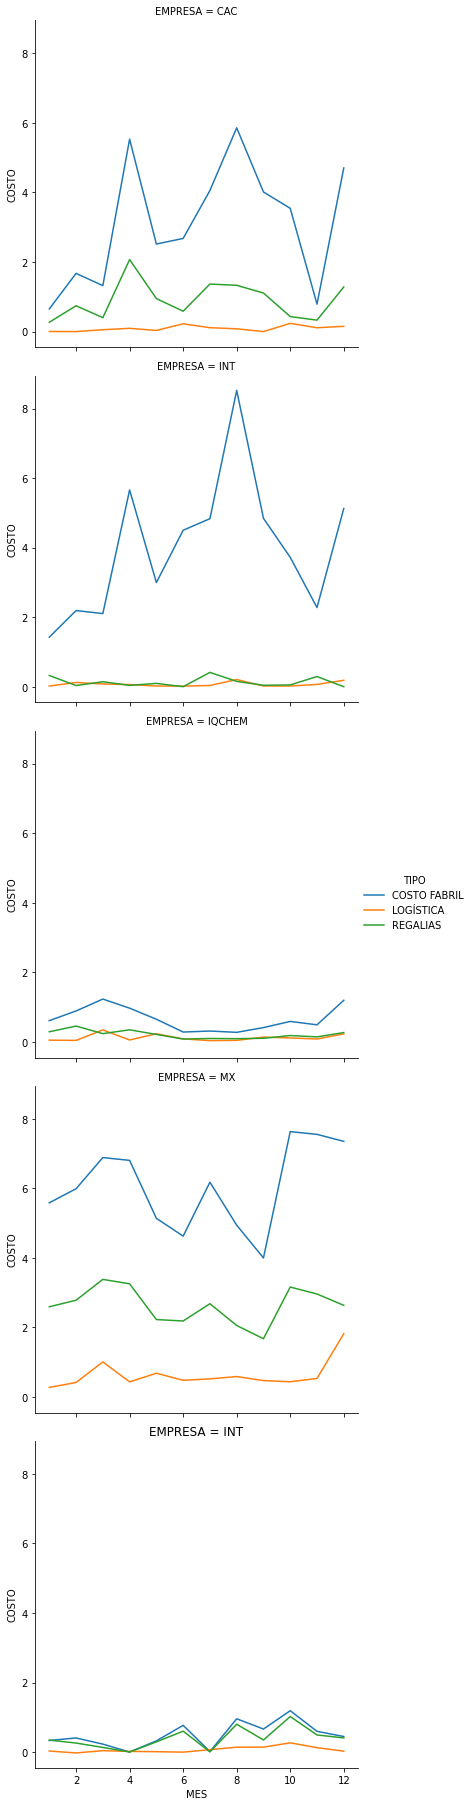

In [14]:
Base10 = Base1.pivot_table(index=['EMPRESA','TIPO','MES'],columns='TIPOS',aggfunc = 'sum', values = 'REAL_')
Base11 = Base10.reset_index()


sns.relplot(x="MES", y="COSTO", 
            data=Base11,
            kind="line", 
            row="EMPRESA",
            hue="TIPO")

# Show plot
plt.title('EMPRESA = INT')
plt.show()

In [15]:
print("Consolidando, es decir, sin considerar el rubro:")


Consolidando, es decir, sin considerar el rubro:


In [16]:
Base12 = Base1.pivot_table(index=['EMPRESA','MES'],columns='TIPOS',aggfunc = 'sum', values = 'REAL_')
Base13 = Base12.reset_index()


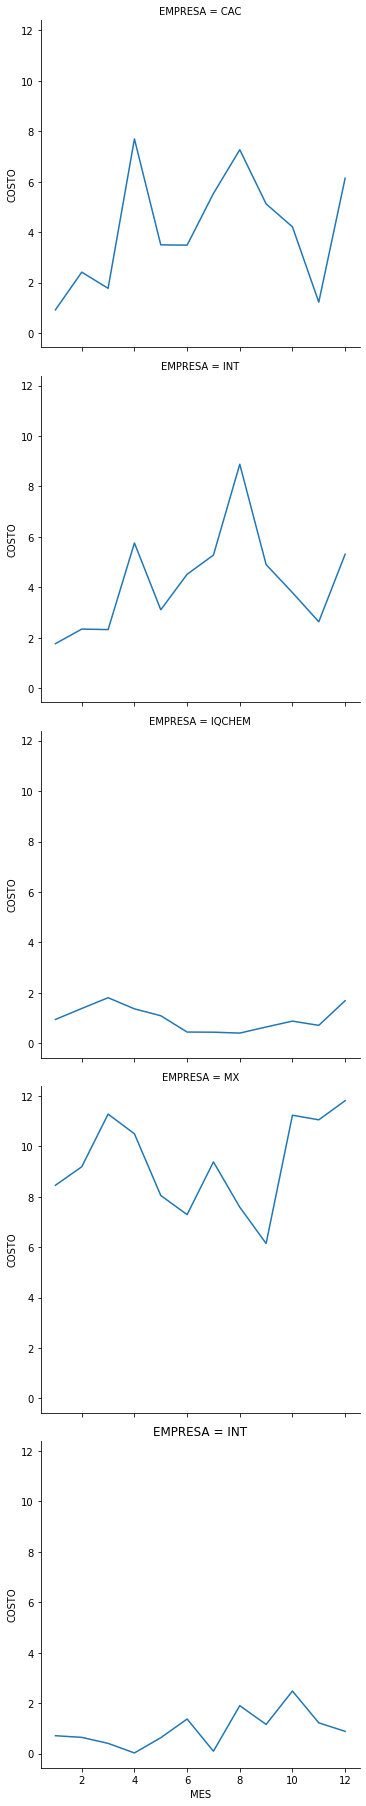

In [17]:
sns.relplot(x="MES", y="COSTO", 
            data=Base13,
            kind="line", 
            row="EMPRESA",
            )

# Show plot
plt.title('EMPRESA = INT')
plt.show()

In [18]:
print("o bien, visualizando en la misma gráfica:")

o bien, visualizando en la misma gráfica:


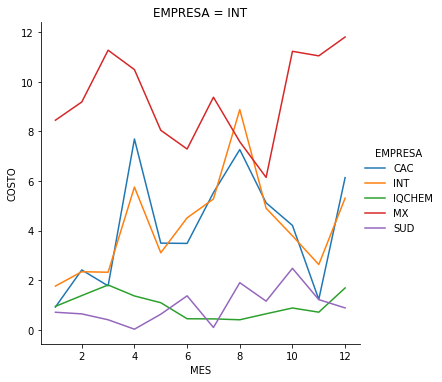

In [19]:
sns.relplot(x="MES", y="COSTO", 
            data=Base13,
            kind="line", 
            hue="EMPRESA",
            )

# Show plot
plt.title('EMPRESA = INT')
plt.show()

In [20]:
print("Agrupando todas las empresas:")

Agrupando todas las empresas:


In [21]:
Base14 = Base1.pivot_table(index=['MES'],columns='TIPOS',aggfunc = 'sum', values = 'REAL_')
Base15 = Base14.reset_index()


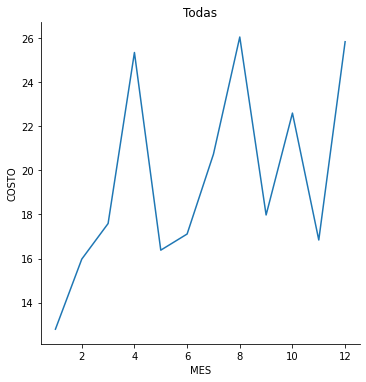

In [22]:
sns.relplot(x="MES", y="COSTO", 
            data=Base15,
            kind="line", 
            )

# Show plot
plt.title('Todas')
plt.show()

In [23]:
print("El rango de costos por empresa es:")


El rango de costos por empresa es:


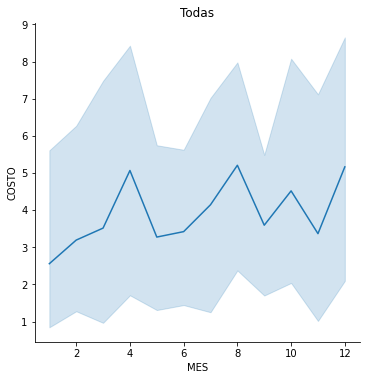

In [24]:
sns.relplot(x="MES", y="COSTO", 
            data=Base13,
            kind="line", 
            )

# Show plot
plt.title('Todas')
plt.show()